# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Getting the data from my folder

In [2]:
from os import listdir
from os.path import isfile, join

IMG_PATH = "C:/Users/vacha/OneDrive/Pictures/Camera Roll/"
file_paths = np.array([IMG_PATH + f for f in listdir(IMG_PATH) if isfile(join(IMG_PATH, f))])
file_paths = np.delete(file_paths, 0)
file_paths

array(['C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20210503_13_13_26_Pro.jpg',
       'C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20211216_16_04_35_Pro.jpg',
       'C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20220521_13_05_57_Pro.jpg',
       'C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20220715_16_05_24_Pro.jpg',
       'C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20220827_15_40_00_Pro.jpg',
       'C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20220827_15_40_01_Pro (2).jpg',
       'C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20220827_15_40_01_Pro.jpg',
       'C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20220827_15_40_02_Pro (2).jpg',
       'C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20220827_15_40_02_Pro.jpg',
       'C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20220827_15_40_03_Pro (2).jpg',
       'C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20220827_15_40_03_Pro (3).jpg',
       'C:/Users/vacha/OneDrive/Pictures/Camera R

In [3]:
len(file_paths)

289

In [4]:
index = np.argwhere(file_paths=='C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20220827_15_48_45_Pro.jpg')
index

array([[84]], dtype=int64)

In [5]:
index = np.argwhere(file_paths==IMG_PATH + 'WIN_20220827_21_04_35_Pro.jpg')
index

array([[222]], dtype=int64)

In [6]:
np.random.seed(42)
no_mask_img = np.append(file_paths[:84],file_paths[222:276])
mask_img = np.array(file_paths[84:222])

In [7]:
len(mask_img), len(no_mask_img)

(138, 138)

In [8]:
print(mask_img)

['C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20220827_15_48_45_Pro.jpg'
 'C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20220827_15_48_46_Pro.jpg'
 'C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20220827_15_48_48_Pro.jpg'
 'C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20220827_15_48_49_Pro.jpg'
 'C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20220827_15_48_50_Pro (2).jpg'
 'C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20220827_15_48_50_Pro (3).jpg'
 'C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20220827_15_48_50_Pro.jpg'
 'C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20220827_15_48_51_Pro.jpg'
 'C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20220827_15_48_52_Pro (2).jpg'
 'C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20220827_15_48_52_Pro.jpg'
 'C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20220827_15_48_53_Pro (2).jpg'
 'C:/Users/vacha/OneDrive/Pictures/Camera Roll/WIN_20220827_15_48_53_Pro.jpg'
 'C:/Users/vacha/OneDrive/Pictures/Camera Roll/W

# Images to tensors

In [9]:
tf.random.set_seed(174734)
mask_tensor = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
mask_labels = tf.Variable([1 for _ in range(len(mask_img))])

for img in mask_img:
    image = tf.io.read_file(img)
    tensor = tf.io.decode_jpeg(image, channels=3)
    tensor = tf.image.resize(tensor, [128,128])
    mask_tensor = mask_tensor.write(mask_tensor.size(), tensor)
mask_images = mask_tensor.stack()

In [10]:
mask_images

<tf.Tensor: shape=(138, 128, 128, 3), dtype=float32, numpy=
array([[[[253.     , 251.     , 254.     ],
         [253.     , 251.     , 254.     ],
         [255.     , 250.5    , 254.5    ],
         ...,
         [174.46875, 181.46875, 189.46875],
         [170.84375, 171.1875 , 177.375  ],
         [170.84375, 176.8125 , 185.15625]],

        [[253.     , 251.     , 254.     ],
         [252.53125, 250.53125, 253.53125],
         [255.     , 250.96875, 254.96875],
         ...,
         [171.125  , 180.125  , 187.125  ],
         [175.71875, 175.1875 , 183.0625 ],
         [172.40625, 176.59375, 185.53125]],

        [[253.     , 251.     , 254.     ],
         [253.78125, 251.78125, 254.78125],
         [255.     , 250.5    , 254.5    ],
         ...,
         [172.28125, 177.59375, 186.15625],
         [167.75   , 174.4375 , 178.75   ],
         [167.3125 , 163.46875, 163.21875]],

        ...,

        [[180.     , 176.     , 173.875  ],
         [179.625  , 175.34375, 177.1875 ]

### labeling data

In [11]:
no_mask_tensor = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
no_mask_labels = tf.Variable([0 for _ in range(len(no_mask_img))])

for img in no_mask_img:
    image = tf.io.read_file(img)
    tensor = tf.io.decode_jpeg(image, channels=3)
    tensor = tf.image.resize(tensor, [128,128])
    no_mask_tensor = no_mask_tensor.write(no_mask_tensor.size(), tensor)
no_mask_images = no_mask_tensor.stack()

In [12]:
# (mask_images, mask_labels, no_mask_images, no_mask_labels)

In [13]:
X = tf.reshape(tf.stack([mask_images, no_mask_images]), [276, 128, 128, 3])
y = tf.reshape(tf.stack([mask_labels, no_mask_labels]), [276])

In [14]:
len(X), X.shape, y.shape, 

(276, TensorShape([276, 128, 128, 3]), TensorShape([276]))

In [15]:
int(len(X)*0.9)

248

# Scaling, Shuffling and Spliting Data

In [16]:
X = X/255. #Scaled

In [17]:
indices = tf.range(start=0, limit=tf.shape(X)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)

X = tf.gather(X, shuffled_indices)
y = tf.gather(y, shuffled_indices)


In [18]:
y, X.shape #Shuffled

(<tf.Tensor: shape=(276,), dtype=int32, numpy=
 array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0])>,
 TensorShape([276,

In [19]:
X_train = X[:248]
X_test = X[248:]
y_train = y[:248]
y_test = y[248:]

# Model Architecture

In [20]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=2, activation='softmax'),
])

# Training

In [21]:
import os
import time

root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_09_10-11_12_37'

In [22]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("mask_detection_l.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [23]:
optimizer = keras.optimizers.RMSprop(decay=1e-4)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=75, callbacks=[checkpoint_cb,tensorboard_cb])

Epoch 1/75
8/8 [==============================] - 23s 3s/step - loss: 6.1420 - accuracy: 0.4597
Epoch 2/75
8/8 [==============================] - 22s 3s/step - loss: 0.6991 - accuracy: 0.4960
Epoch 3/75
8/8 [==============================] - 24s 3s/step - loss: 0.6995 - accuracy: 0.4476
Epoch 4/75
8/8 [==============================] - 24s 3s/step - loss: 0.6994 - accuracy: 0.4919
Epoch 5/75
8/8 [==============================] - 25s 3s/step - loss: 0.7165 - accuracy: 0.5403
Epoch 6/75
8/8 [==============================] - 26s 3s/step - loss: 0.7003 - accuracy: 0.5484
Epoch 7/75
8/8 [==============================] - 25s 3s/step - loss: 0.6899 - accuracy: 0.5806
Epoch 8/75
8/8 [==============================] - 23s 3s/step - loss: 0.6948 - accuracy: 0.4919
Epoch 9/75
8/8 [==============================] - 25s 3s/step - loss: 0.7126 - accuracy: 0.5726
Epoch 10/75
8/8 [==============================] - 26s 3s/step - loss: 0.6798 - accuracy: 0.5605
Epoch 11/75
8/8 [======================

8/8 [==============================] - 26s 3s/step - loss: 0.7796 - accuracy: 0.5968
Epoch 23/75
8/8 [==============================] - 27s 3s/step - loss: 0.7248 - accuracy: 0.5081
Epoch 24/75
8/8 [==============================] - 26s 3s/step - loss: 0.6901 - accuracy: 0.5524
Epoch 25/75
8/8 [==============================] - 26s 3s/step - loss: 0.6807 - accuracy: 0.5605
Epoch 26/75
8/8 [==============================] - 26s 3s/step - loss: 0.6944 - accuracy: 0.5565
Epoch 27/75
8/8 [==============================] - 24s 3s/step - loss: 1.7228 - accuracy: 0.6210
Epoch 28/75
8/8 [==============================] - 24s 3s/step - loss: 0.7042 - accuracy: 0.6532
Epoch 29/75
8/8 [==============================] - 25s 3s/step - loss: 0.7568 - accuracy: 0.6371
Epoch 30/75
8/8 [==============================] - 24s 3s/step - loss: 0.6180 - accuracy: 0.7177
Epoch 31/75
8/8 [==============================] - 24s 3s/step - loss: 0.6531 - accuracy: 0.6734
Epoch 32/75
8/8 [=========================

Epoch 44/75
8/8 [==============================] - 26s 3s/step - loss: 0.3054 - accuracy: 0.9194
Epoch 45/75
8/8 [==============================] - 26s 3s/step - loss: 0.1462 - accuracy: 0.9556
Epoch 46/75
8/8 [==============================] - 26s 3s/step - loss: 0.1322 - accuracy: 0.9637
Epoch 47/75
8/8 [==============================] - 26s 3s/step - loss: 0.0640 - accuracy: 0.9879
Epoch 48/75
8/8 [==============================] - 27s 3s/step - loss: 0.0557 - accuracy: 0.9718
Epoch 49/75
8/8 [==============================] - 27s 3s/step - loss: 0.2916 - accuracy: 0.9234
Epoch 50/75
8/8 [==============================] - 24s 3s/step - loss: 0.4146 - accuracy: 0.8065
Epoch 51/75
8/8 [==============================] - 26s 3s/step - loss: 0.0843 - accuracy: 0.9798
Epoch 52/75
8/8 [==============================] - 25s 3s/step - loss: 0.0481 - accuracy: 0.9879
Epoch 53/75
8/8 [==============================] - 25s 3s/step - loss: 0.1049 - accuracy: 0.9798
Epoch 54/75
8/8 [=============

8/8 [==============================] - 25s 3s/step - loss: 0.0547 - accuracy: 0.9879
Epoch 66/75
8/8 [==============================] - 28s 3s/step - loss: 0.0443 - accuracy: 0.9879
Epoch 67/75
8/8 [==============================] - 26s 3s/step - loss: 0.0277 - accuracy: 0.9879
Epoch 68/75
8/8 [==============================] - 27s 3s/step - loss: 2.8136 - accuracy: 0.8992
Epoch 69/75
8/8 [==============================] - 25s 3s/step - loss: 0.0086 - accuracy: 0.9960
Epoch 70/75
8/8 [==============================] - 25s 3s/step - loss: 0.0173 - accuracy: 0.9919
Epoch 71/75
8/8 [==============================] - 26s 3s/step - loss: 0.2170 - accuracy: 0.9637
Epoch 72/75
8/8 [==============================] - 26s 3s/step - loss: 0.0074 - accuracy: 0.9960
Epoch 73/75
8/8 [==============================] - 27s 3s/step - loss: 9.7748e-04 - accuracy: 1.0000
Epoch 74/75
8/8 [==============================] - 24s 3s/step - loss: 3.4417e-04 - accuracy: 1.0000
Epoch 75/75
8/8 [=================

In [24]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

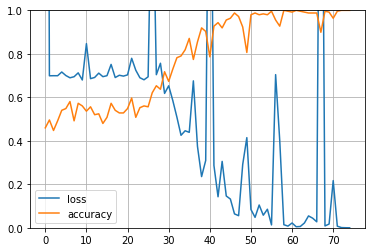

In [25]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Saving and Loading

In [26]:
model.save('mask_detection_l.h5')

In [27]:
model = keras.models.load_model("mask_detection_l.h5") # rolls back to best model
(model.evaluate(X_train, y_train), model.evaluate(X_test, y_test))

1/1 [==============================] - 1s 510ms/step - loss: 0.3151 - accuracy: 0.9643


([1.4814325368206482e-05, 1.0], [0.31506118178367615, 0.9642857313156128])

# Testing on new Images

# array[prob(NoMask), prob(Mask)]

In [83]:
def plot_color_image(tensor_image):
    plt.imshow(tensor_image, interpolation="nearest")
    plt.axis("off")

In [95]:
def imgpath_to_tensor(n):
    IMG_PATH = "C:/Users/vacha/OneDrive/Pictures/Camera Roll/"
    file_path = np.array([IMG_PATH + f for f in listdir(IMG_PATH) if isfile(join(IMG_PATH, f))])
    file_path = np.delete(file_path, 0)
    file_path = file_path[n]
    images = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
    image = tf.io.read_file(file_path)
    tensor = tf.io.decode_jpeg(image, channels=3)
    tensor = tf.image.resize(tensor, [128,128])
    images = images.write(images.size(), tensor)
    tensor_image = images.stack()
    return tf.reshape(tensor_image/255., [128, 128, 3]), tensor_image/255.

def img(n=-1):
    return plot_color_image(imgpath_to_tensor(n)[0])

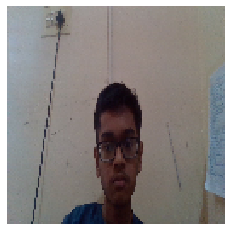

In [96]:
img(-9)

In [88]:
y_proba = model.predict(imgpath_to_tensor(-9)[1])
y_proba

1/1 [==============================] - 0s 56ms/step


array([[9.9999928e-01, 7.0246153e-07]], dtype=float32)

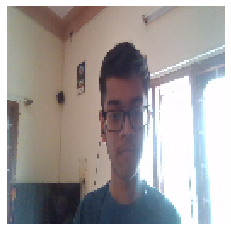

In [101]:
img(-8)

In [102]:
y_proba = model.predict(imgpath_to_tensor(-8)[1])
y_proba

1/1 [==============================] - 0s 50ms/step


array([[9.999765e-01, 2.346196e-05]], dtype=float32)

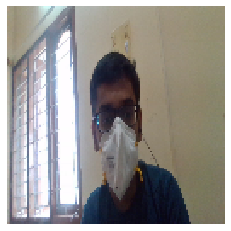

In [103]:
img(-3)

In [104]:
y_proba = model.predict(imgpath_to_tensor(-3)[1])
y_proba

1/1 [==============================] - 0s 53ms/step


array([[0., 1.]], dtype=float32)

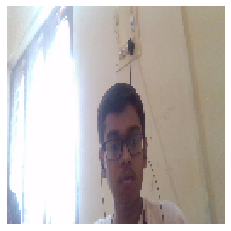

In [105]:
img(-1)

In [106]:
y_proba = model.predict(imgpath_to_tensor(-1)[1])
y_proba

1/1 [==============================] - 0s 42ms/step


array([[1.0000000e+00, 2.1436993e-08]], dtype=float32)

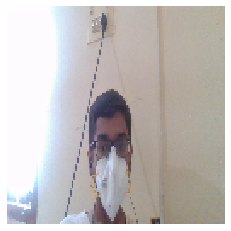

In [109]:
img(-1) #Model predicted wrong

In [110]:
y_proba = model.predict(imgpath_to_tensor(-1)[1])
y_proba # Wrong

1/1 [==============================] - 0s 45ms/step


array([[9.9998116e-01, 1.8813938e-05]], dtype=float32)

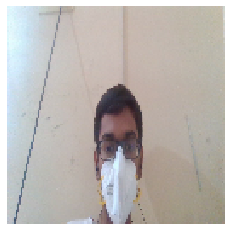

In [111]:
img(-1)

In [112]:
y_proba = model.predict(imgpath_to_tensor(-1)[1])
y_proba

1/1 [==============================] - 0s 52ms/step


array([[1.2896457e-08, 1.0000000e+00]], dtype=float32)

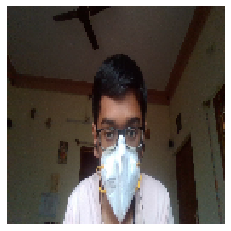

In [115]:
img(-1)

In [116]:
y_proba = model.predict(imgpath_to_tensor(-1)[1])
y_proba

1/1 [==============================] - 0s 118ms/step


array([[0., 1.]], dtype=float32)

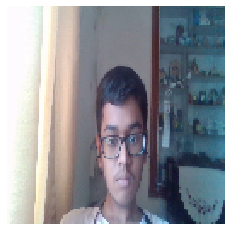

In [127]:
img(-1)

In [128]:
y_proba = model.predict(imgpath_to_tensor(-1)[1])
y_proba

1/1 [==============================] - 0s 104ms/step


array([[9.9975675e-01, 2.4325744e-04]], dtype=float32)

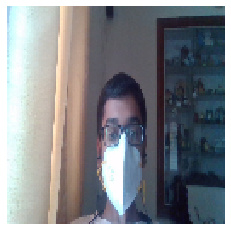

In [129]:
img(-1)

In [130]:
y_proba = model.predict(imgpath_to_tensor(-1)[1])
y_proba

1/1 [==============================] - 0s 119ms/step


array([[1.5977253e-10, 1.0000000e+00]], dtype=float32)